<a href="https://colab.research.google.com/github/NayelySaldivar/DAPT_APR2021/blob/main/FeatureEngineering_%26_WorkflowML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [7 Fundamental Steps to Complete a Data Analytics Project](https://blog.dataiku.com/2019/07/04/fundamental-steps-data-project-success)

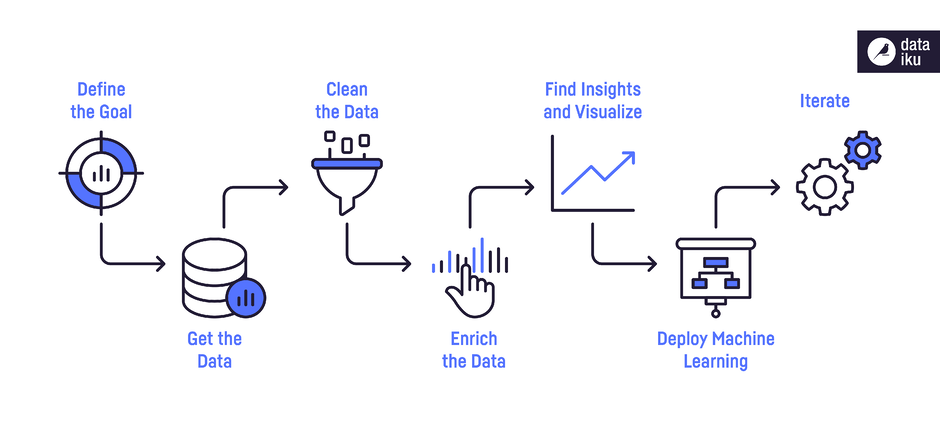

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
!pip install feature_engine

     |████████████████████████████████| 176 kB 5.4 MB/s 
     |████████████████████████████████| 9.5 MB 37.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [5]:
# Leer BD
census = pd.read_csv('/content/census.csv')

# Exploración Inicial del Dataset

In [7]:
census.head(3)

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,1263.0,27317,711,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,32964.0,2973.0,16824,798,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6


In [28]:
census.shape

(3220, 37)

In [ ]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3218 entries, 0 to 3219
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CensusId         3218 non-null   int64  
 1   State            3218 non-null   object 
 2   County           3218 non-null   object 
 3   TotalPop         3218 non-null   int64  
 4   Men              3218 non-null   int64  
 5   Women            3218 non-null   int64  
 6   Hispanic         3218 non-null   float64
 7   White            3218 non-null   float64
 8   Black            3218 non-null   float64
 9   Native           3218 non-null   float64
 10  Asian            3218 non-null   float64
 11  Pacific          3218 non-null   float64
 12  Citizen          3218 non-null   int64  
 13  Income           3218 non-null   float64
 14  IncomeErr        3218 non-null   float64
 15  IncomePerCap     3218 non-null   int64  
 16  IncomePerCapErr  3218 non-null   int64  
 17  Poverty       

# Tratamiento de nulos

In [8]:
# Listado con columnas de datos nulos
column_with_nan = census.columns[census.isnull().any()]
column_with_nan

Index(['Income', 'IncomeErr', 'ChildPoverty'], dtype='object')

In [106]:
# Elimino columnas con más del 50%
for column in column_with_nan:
    if census[column].isnull().sum()*100/census.shape[0] > 50:
        census.drop(column, axis = 1, inplace=True)

In [52]:
df_null = census[census.Income.isnull() | census.ChildPoverty.isnull()][['Income', 'IncomeErr', 'ChildPoverty']]
df_null

,Income,IncomeErr,ChildPoverty
548,66250.0,9909.0,NaN
2673,NaN,NaN,0.0


## Missing Indicator

Es una variable binaria adicional que nos indica si existe un dato faltante en una observación (1) o no (0)

Útil para variables categóricas y numéricas

Se usa junto con métodos que suponen que faltan datos al azar

**Ventajas**:

1.    Fácil de implementar
2.    Captura la importancia de los datos faltantes

**Desventajas**:
1.    Crea nuevas columnas
2.    La variable original debe de imputar datos faltantes

In [11]:
from feature_engine import imputation as mdi

missing_ind = mdi.AddMissingIndicator()

In [53]:
temp = missing_ind.fit_transform(df_null)

In [54]:
temp

,Income,IncomeErr,ChildPoverty,Income_na,IncomeErr_na,ChildPoverty_na
548,66250.0,9909.0,NaN,0,0,1
2673,NaN,NaN,0.0,1,1,0


## Mean - Median Imputation

Consiste en **reemplazar todos los datos faltantes** de una variable por la **media** o la **mediana** de la variable.
<br>
<br>
¿Cúando debemos usar la media y cuando la mediana? <br>
Sí los datos están normalmente distribuidos la media y la mediana son aproximadamente iguales.

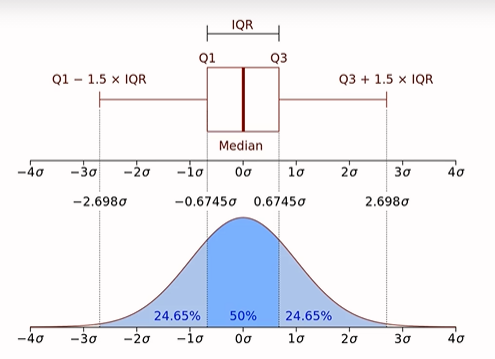


Sí los datos están sesgados, la mediana es una mejor opción

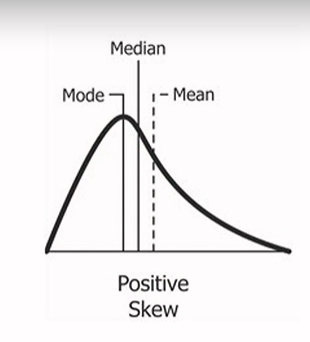


**Ventajas**:

1.    Fácil de implementar.
2.    Manera rápida de completar los datasets.

**Desventajas**:

1.    Distorsiona la distribución de la variable original.
2.    Distorsiona la varianza original.
3.    Entre mayor sea la proporción de datos nulos, mayor es la distorsión.

*¿Cuándo debemos utilizarla?* <br>
Es una buena aproximación cuando tenemos como máximo el 5% de datos son nulos.

El valor de la media o la mediana debe calcularse solamente en el data set de entrenamiento para reemplazar datos nulos en el dataset de entrenamiento y en el data set de prueba para evitar over-fitting.

In [47]:
census[column_with_nan].describe()

,Income,IncomeErr,ChildPoverty
count,3219.000000,3219.000000,3219.000000
mean,46129.868903,2850.395464,24.180801
std,12911.297940,1918.942273,11.698329
min,10499.000000,270.000000,0.000000
25%,38191.500000,1635.000000,16.300000
50%,44749.000000,2406.000000,22.700000
75%,52074.000000,3446.000000,30.000000
max,123453.000000,21355.000000,81.600000


In [72]:
imp = mdi.MeanMedianImputer(imputation_method='median')
imp.fit(census[column_with_nan])

MeanMedianImputer(imputation_method='median', variables=None)

In [73]:
imp.imputer_dict_

{'ChildPoverty': 22.7, 'Income': 44749.0, 'IncomeErr': 2406.0}

In [75]:
df_null

,Income,IncomeErr,ChildPoverty
548,66250.0,9909.0,NaN
2673,NaN,NaN,0.0


In [74]:
temp = imp.transform(df_null)
temp

,Income,IncomeErr,ChildPoverty
548,66250.0,9909.0,22.7
2673,44749.0,2406.0,0.0


## Categorical Imputation

El metodo consiste en tratar los datos nulos como una etiqueta más de la variable, es decir que todos los datos faltantes se agruparían con la etiqueta *missing*.

**Ventajas**:

1.    Fácil de implementar
2.    Captura la importancia de los "datos nulos" si es que existe alguna.

**Desventajas**:
1.    Sí los datos faltantes son pocos y la variable presenta alta cardinalidad 

In [96]:
df_null_cat = pd.DataFrame(census.County[:5])
df_null_cat

,County
0,Autauga
1,Baldwin
2,Barbour
3,Bibb
4,Blount


In [97]:
df_null_cat['County_null'] = np.where(df_null_cat['County'] == 'Baldwin', np.nan, df_null_cat['County'])

In [98]:
df_null_cat

,County,County_null
0,Autauga,Autauga
1,Baldwin,NaN
2,Barbour,Barbour
3,Bibb,Bibb
4,Blount,Blount


In [102]:
imp = mdi.CategoricalImputer(fill_value='Sin_Info')

In [103]:
temp = imp.fit_transform(df_null_cat)
temp.head()

,County,County_null
0,Autauga,Autauga
1,Baldwin,Sin_Info
2,Barbour,Barbour
3,Bibb,Bibb
4,Blount,Blount


In [108]:
census.shape

(3220, 37)

In [109]:
census.dropna(inplace = True)
census.shape

(3218, 37)

# Revisión de Outliers

¿Por qué es importante tratar los datos atípicos? <br>
El problema radica en que son elementos que pueden no ser representativos de la población y por ende, pueden llegar a distorsionar los resultados de la misma en algunas pruebas estadísticas. 

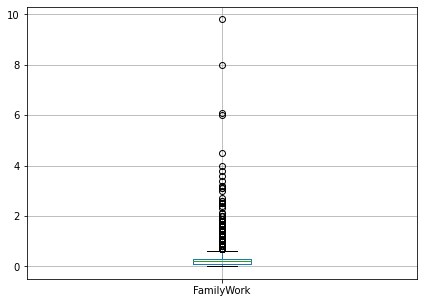

In [116]:
plt.figure(figsize=(7,5))
census.boxplot(column=['FamilyWork'])
plt.show()

In [117]:
q1, q3 = np.percentile(census.FamilyWork, [25,75] )
iqr = q3 - q1
upper = q3 + (3*iqr)
lower = q1 - (3*iqr)

In [118]:
upper

0.8999999999999999

In [119]:
lower 

-0.5

In [121]:
census_clean = census.loc[census.FamilyWork < upper].copy()

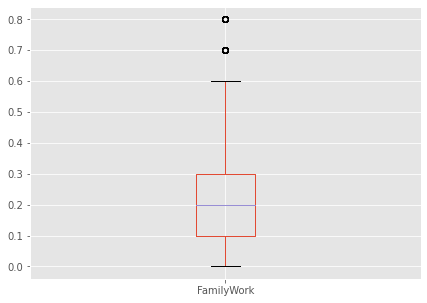

In [123]:
plt.figure(figsize=(7,5))
census_clean.boxplot(column=['FamilyWork'])
plt.show()

In [124]:
print(f'Shape inicial: {census.shape} \nShape final:{census_clean.shape}')

Shape inicial: (3218, 37) 
Shape final:(3020, 37)


# Cambio de Dimensión en Variables
Permite podemos evaluar y comparar los resultados de múltiples modelos ya que nos ayuda a que el entrenamiento del modelo sea menos sensible a la escala de las caracteristicas y esto ayudará a resolver mejor los coeficientes sin que una variable *pese más que otra*.

## Reescalar variables manualmente
La manera más fácil de tranformar variables que están en la misma escala.

In [130]:
# Definiendo las columnas que en mi dataset van de 0 a 100 para escalar
conversion=['Hispanic','White', 'Black', 'Native', 'Asian', 'Pacific', 'Poverty', 'Service', 'Office']

def escala(x):
    return(x/100).round(3)

In [131]:
# Renombrar columnas
n_columns = [ x + 'Rate' for x in conversion]
census_clean[n_columns] = census_clean[conversion].apply(escala)

In [132]:
census_clean[['Black','BlackRate']] .head()

,Black,BlackRate
0,18.5,0.185
1,9.5,0.095
2,46.7,0.467
3,21.4,0.214
4,1.5,0.015


## Estandarización de variables <br>
 1. Compara características que tengan diferentes unidades o escalas.
 2. Tiende a que los procesos de entrenamiento se comporten de una mejor manera.

### StandardScaler: <br>
Resta la media y divide entre la desviación estándar de los datos buscando que queden con **media 0 y varianza 1**. <br>
Puedes utilizarlo cuando tus datos tienen distribución normal.

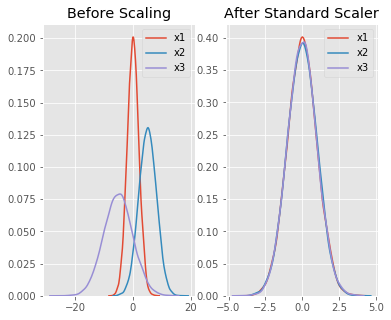

In [145]:
from  sklearn.preprocessing import StandardScaler

scale = StandardScaler()
census_clean['TotalPopStandardScaler'] = scale.fit_transform(census_clean.TotalPop.values.reshape(-1,1))
census_clean.TotalPopStandardScaler.describe().round(2)

count    3020.00
mean       -0.00
std         1.00
min        -0.32
25%        -0.28
50%        -0.23
75%        -0.10
max        30.21
Name: TotalPopStandardScaler, dtype: float64

### Min-Max Scaler <br>
Transformar cada valor de la columna entre un rango de [0,1] <br>
Se puede utilizar cuando tu data está acotada, es decir que conoces lo límites superior e inferior.

In [146]:
from sklearn.preprocessing import MinMaxScaler

census_clean['TotalPopMinMaxScaler'] = MinMaxScaler().fit_transform(census_clean.TotalPop.values.reshape(-1,1))
census_clean.TotalPopMinMaxScaler.describe()

count    3020.000000
mean        0.010478
std         0.032757
min         0.000000
25%         0.001265
50%         0.002822
75%         0.007227
max         1.000000
Name: TotalPopMinMaxScaler, dtype: float64

In [148]:
census_clean[['TotalPop','TotalPopStandardScaler','TotalPopMinMaxScaler']]

,TotalPop,TotalPopStandardScaler,TotalPopMinMaxScaler
0,55221,-0.152784,0.005475
1,195121,0.272755,0.019411
2,26932,-0.238831,0.002656
3,22604,-0.251996,0.002225
4,57710,-0.145213,0.005722
...,...,...,...
3215,56858,-0.147804,0.005638
3216,9130,-0.292980,0.000883
3217,24685,-0.245666,0.002433
3218,36279,-0.210400,0.003588


# Codificación de variables

## Variables Dummy / One Hot Encoding

##Label Encoding: 
Asigna un valor a cada opción de una columna categórica (los transforma en valores numéricos) <br>

Nacionalidad = [Col, Mx, Br] <br>
|<br>
| (Col =1 , Mx = 0 , Br = 2 )<br>
v<br>
NacionalidadEncoded = [1, 0, 2]<br>

##One Hot Encoding
Crea columnas de 0's y 1's para cada uno de tus valores: <br>
[Nacionalidad | ColEncoded | MXEncoded | BREncoded]


In [ ]:
estados = pd.get_dummies(census_clean.State)
census_dummy = pd.concat([census_clean,estados],axis=1).copy()
census_dummy.columns.values

array(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific',
       'Citizen', 'Income', 'IncomeErr', 'IncomePerCap',
       'IncomePerCapErr', 'Poverty', 'ChildPoverty', 'Professional',
       'Service', 'Office', 'Construction', 'Production', 'Drive',
       'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'HispanicRate',
       'WhiteRate', 'BlackRate', 'NativeRate', 'AsianRate', 'PacificRate',
       'PovertyRate', 'ServiceRate', 'OfficeRate',
       'TotalPopStandardScaler', 'TotalPopMinMaxScaler', 'Alabama',
       'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachu

In [ ]:
census_dummy[['State','Alabama']]

,State,Alabama
0,Alabama,1
1,Alabama,1
2,Alabama,1
3,Alabama,1
4,Alabama,1
...,...,...
3215,Puerto Rico,0
3216,Puerto Rico,0
3217,Puerto Rico,0
3218,Puerto Rico,0


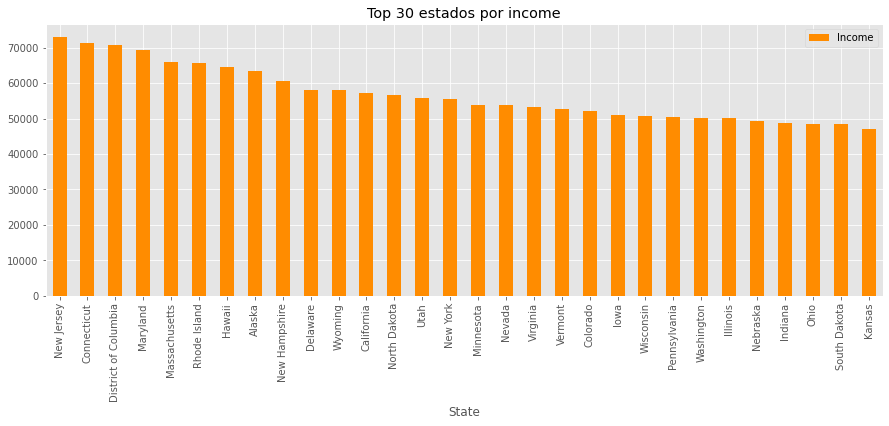

In [ ]:
# Graficamos por estados que tienen un mayor income

fig = plt.figure(figsize=(15,5))
ax = fig.gca()
census_dummy.groupby('State')[['Income']].mean().sort_values('Income',ascending = False).head(30).plot.bar(ax=ax, color='darkorange')
ax.set_title('Top 30 estados por income');

# Sección del dataset

## Shuffling <br>
Toma muestras de la población y genera cambios aleatorios en el **orden** del dataset.

In [ ]:
census_dummy.shape

(3020, 100)

In [ ]:
s_census = census_dummy.sample(frac = 1, random_state = 0)
s_census_2 = census_dummy.sample(n = 100)

In [ ]:
s_census.head(2)

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,HispanicRate,WhiteRate,BlackRate,...,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
702,18011,Indiana,Boone,60511,29997,30514,2.5,92.4,1.2,0.2,2.2,0.0,43203,67552.0,2778.0,38038,1632,5.8,6.2,45.1,13.1,21.6,7.7,12.6,86.1,7.0,0.2,0.6,1.4,4.7,24.5,30471,84.0,9.9,6.0,0.1,3.7,0.025,0.924,0.012,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
164,5107,Arkansas,Phillips,20391,9529,10862,1.6,35.2,61.5,0.1,0.1,0.0,14771,26844.0,1699.0,16700,1201,34.1,52.4,26.6,24.2,24.0,9.4,15.8,75.4,18.3,0.1,2.1,1.3,2.8,19.5,6932,69.4,23.6,7.0,0.0,18.1,0.016,0.352,0.615,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
s_census_2.head(2)

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,HispanicRate,WhiteRate,BlackRate,...,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1804,35017,New Mexico,Grant,29119,14383,14736,49.2,47.6,0.5,0.7,0.1,0.0,22384,38311.0,2093.0,23011,1917,20.8,31.1,33.7,21.2,22.4,15.7,7.0,80.2,10.0,0.4,3.1,0.5,5.8,18.0,10585,68.9,23.5,7.0,0.6,9.7,0.492,0.476,0.005,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
893,20011,Kansas,Bourbon,14812,7324,7488,2.3,91.0,3.5,0.8,0.9,0.0,11018,38280.0,2234.0,20783,1113,19.2,28.7,31.6,21.3,19.0,10.1,18.0,82.6,8.8,0.2,2.5,0.4,5.4,17.9,6541,75.8,18.3,5.8,0.1,3.3,0.023,0.910,0.035,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Sampling <br>

In [ ]:
census_clean.shape

(3020, 48)

In [ ]:
census_sample_proporcion = census_clean.sample(frac=.5)
census_sample_rows = census_clean.sample(n = 1000)

print(census_sample_proporcion.shape)
print(census_sample_rows.shape)

(1510, 48)
(1000, 48)


## Train_test_split() <br>
Nos ayuda a dividir nuestro dataset en grupos de entrenamiento y prueba.


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(census_dummy, train_size=.2)
print(train.shape, test.shape)

(604, 100) (2416, 100)


# Creación del modelo

In [ ]:
df = census_dummy._get_numeric_data()
df.head(2)

,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,HispanicRate,WhiteRate,BlackRate,NativeRate,AsianRate,...,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1001,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6,0.026,0.758,0.185,0.004,0.010,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1003,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,1263.0,27317,711,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5,0.045,0.831,0.095,0.006,0.007,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Definición de las variables predictoras y el target:

In [ ]:
X = df.drop(columns=['TotalPop','CensusId'])
y = df.TotalPop

Construimos los datasets de entrenamiento y prueba:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

## Regresión Lineal

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, classification_report

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)

In [ ]:
df_predicted = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df_predicted.head(5)

,Actual,Predicted
2273,37938,37938.0
639,524886,524886.0
3006,30201,30201.0
331,67806,67806.0
3067,9150,9150.0


In [ ]:
r2_score(y_test,y_pred)

1.0

#Cross Validation con KFold
Esto es una medida preventiva contra el overfitting
Generar multiples divisiones a partir de neustro dataset pra entrenar iterativamente nuestro modelo.


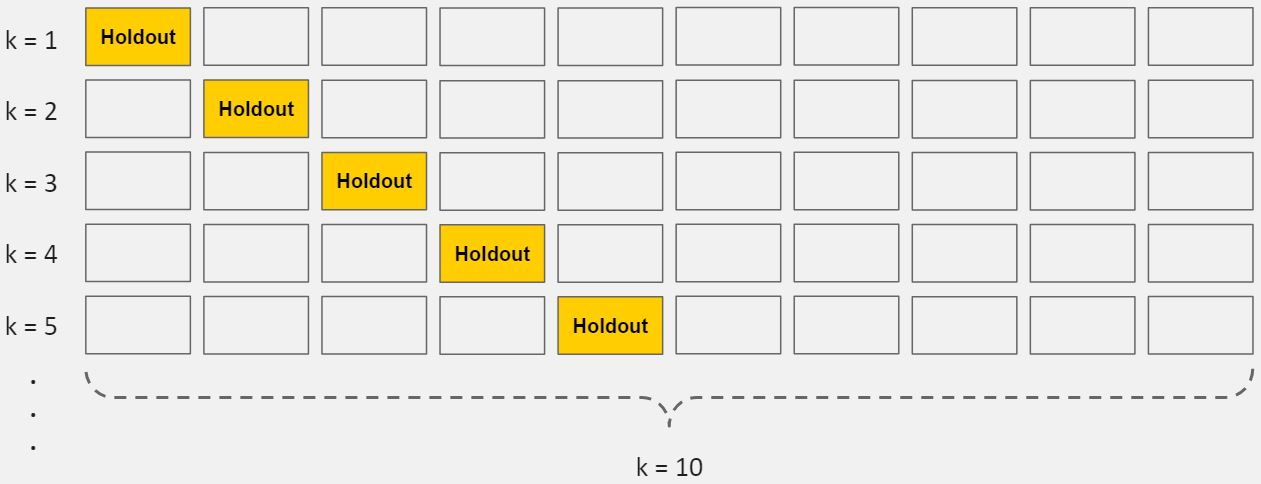

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score

In [ ]:
linreg = LinearRegression()

In [ ]:
X = df.drop(columns=['Income','CensusId'])
y = df.Income

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=77)

In [ ]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = linreg.predict(X_test)

In [ ]:
df_predicted = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_predicted

,Actual,Predicted
444,88816.0,78263.771433
1929,35777.0,34189.963359
1601,50115.0,52948.259774
838,55033.0,53283.585166
2617,43375.0,36710.810846
...,...,...
458,63824.0,63154.611751
2688,38929.0,45539.833671
2072,40930.0,40069.965791
2069,37319.0,41587.216955


In [ ]:
r2_score(y_test,y_pred)

0.9009578765535222

In [ ]:
#KFold
#Generar 10 pruebas con neustro dataset original
#Shuffle es para "mezclar" nuestro dataset
#Random_state = para que nuestros resultados siempre sean iguales
#que neustros datasets no cambiben aleatoriamente
kfold = KFold(n_splits = 10, random_state=1, shuffle=True)

In [ ]:
#Generando la validación cruzada y su r2
#Loop para imprimir los coeficientes de la regresión
cv_r2_scores = cross_val_score(linreg, X, y, cv=kfold, scoring='r2')

In [ ]:
print(cv_r2_scores)

[0.92231067 0.90189138 0.91100521 0.92642834 0.92390506 0.8945021
 0.91031041 0.89623393 0.9225371  0.90152752]


In [ ]:
#sacamos la media de nuestro cross_val para evaluar
#la r2 de nuestro modelo
np.mean(cv_r2_scores)

0.9110651723984684